# Waterflow

Pour le projet Waterflow, il nous est demmandé de déveopper un outil décisionnel permettant l'identification d'eau potable à la consommation humaine.
Pour ce, nous devrions suivre des étapes de prétraitement des données et analyse exploratoire.

In [61]:
import pandas as pd
import numpy as np

In [62]:
data=pd.read_csv("water_potability.csv")

data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [63]:
print("dimension :",data.shape)
data.info()

dimension : (3276, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Le fichier est composé de 3276 lignes et de 10 colonnes 

Quelques statistiques descriptives

In [64]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Pourcentage et Visualisation des valeurs manquantes

In [65]:

missing = data.isnull().mean().sort_values(ascending=False) * 100
print(missing[missing > 0])


Sulfate            23.840049
ph                 14.987790
Trihalomethanes     4.945055
dtype: float64


Les colonnes Sulfate, ph et trihalomethanes ont un pourcentage de valeur manquantes respectif de 23.84, 14.99 et de 4.95

Pour la visualisation, nous allons utiliser matplotlib et minsingno qui permet de mieux comprendre et analyser les valeurs manquantes de notre jeu de données.

In [66]:
import matplotlib.pyplot as plt
import missingno as msno

<Axes: >

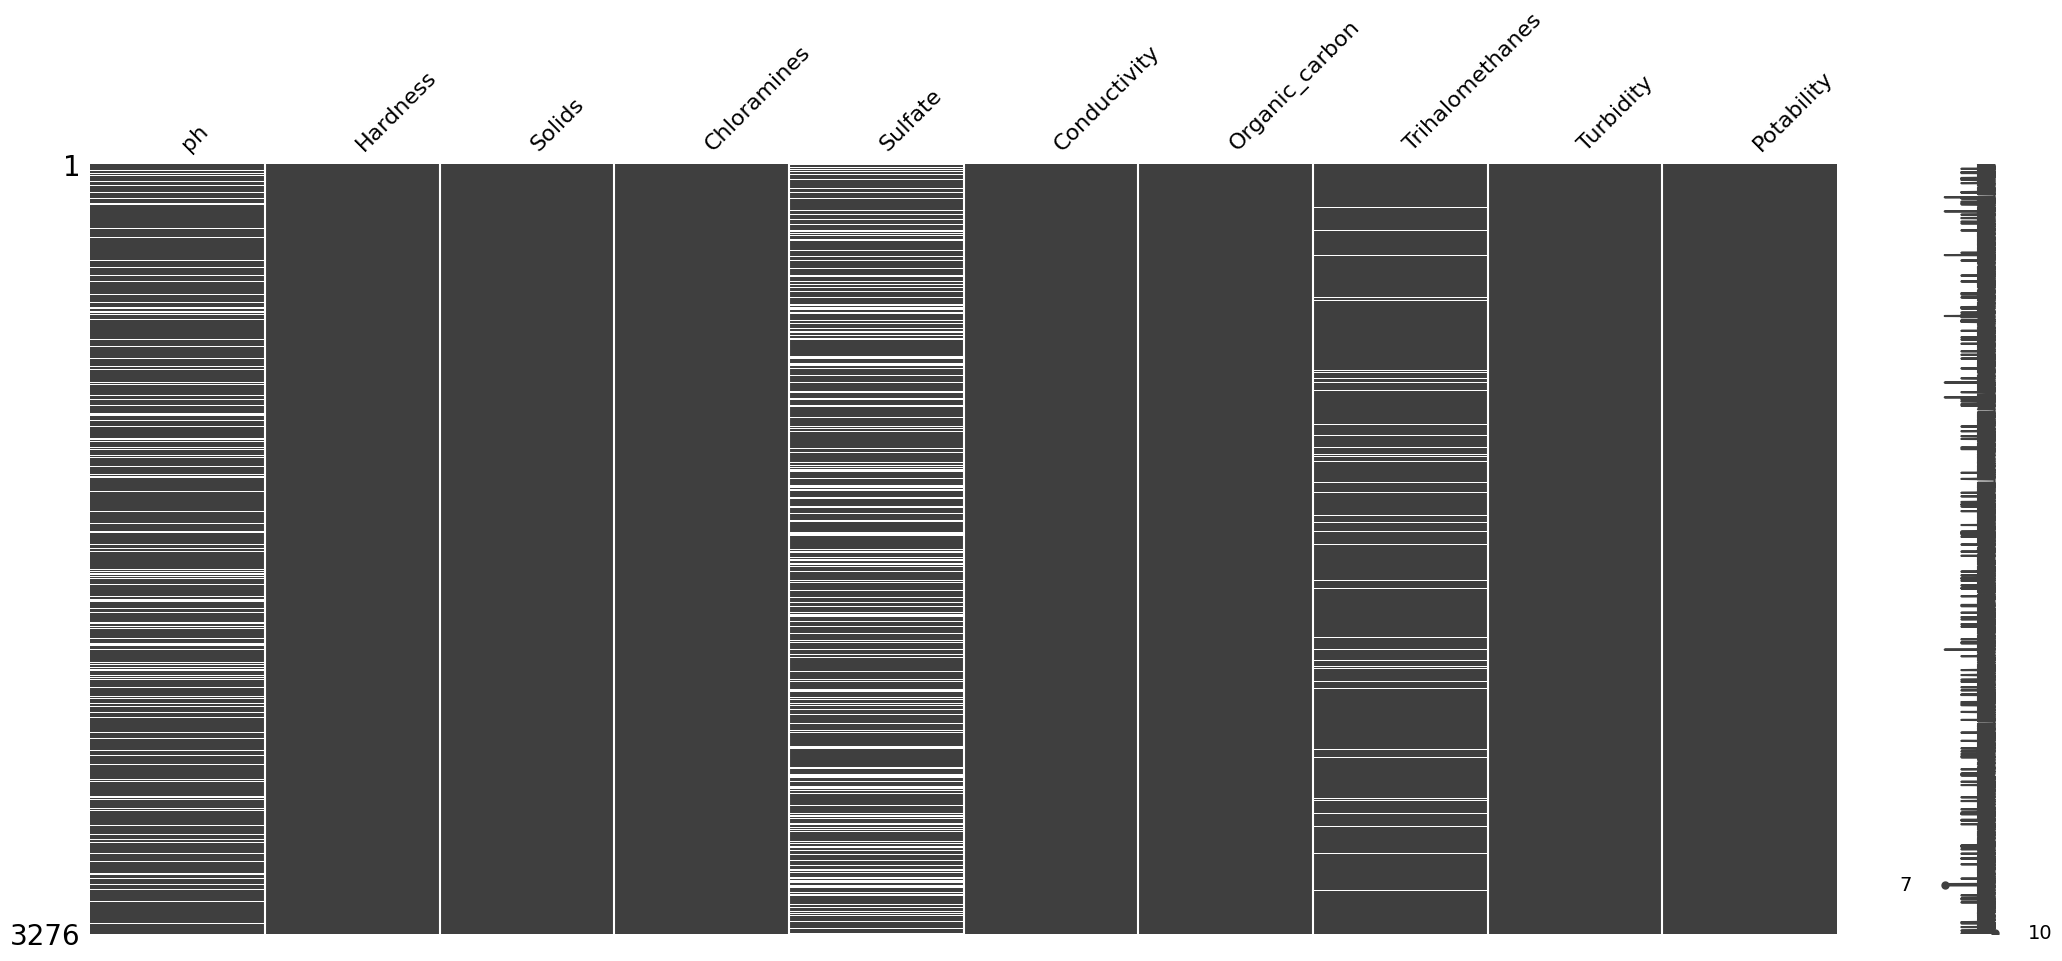

In [67]:
msno.matrix(data)
plt.show()


Nous avons un apperçu de comment les valeurs manquantes sont représentées dans les colonnes Sulfate, ph et trihalomethanes.

## Analyse univariée

array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>],
       [<Axes: title={'center': 'Potability'}>, <Axes: >, <Axes: >]],
      dtype=object)

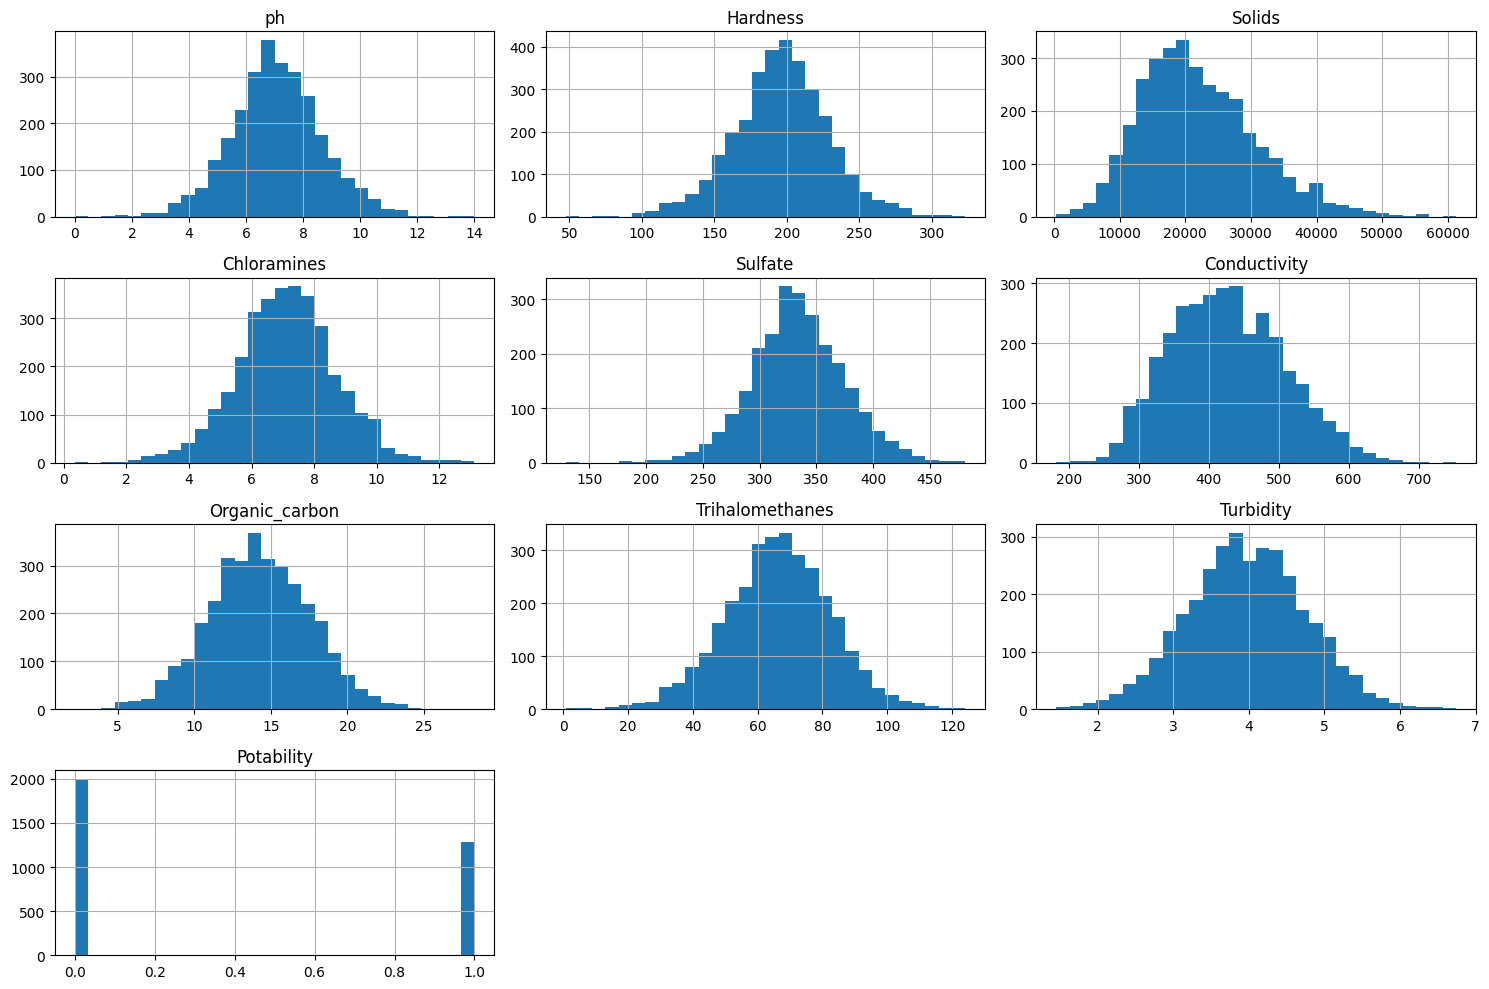

In [68]:
data.select_dtypes(include='number').hist(figsize=(15,10), bins=30)
plt.tight_layout()
plt.show()


La distribution des variables est plutôt asymétrique pour certaines variables comme Solids ou Trihalomethanes.

ph et Hardness peuvent suivre une distribution plus normale.
Certains pics présentent des valeurs aberrantes, une standardisation est nécessaire.

## Analyse bivariée

Pour une autre approche de la visualisation, nous installons seaborn

In [69]:
import seaborn as sns

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Matrice de Corrélation')

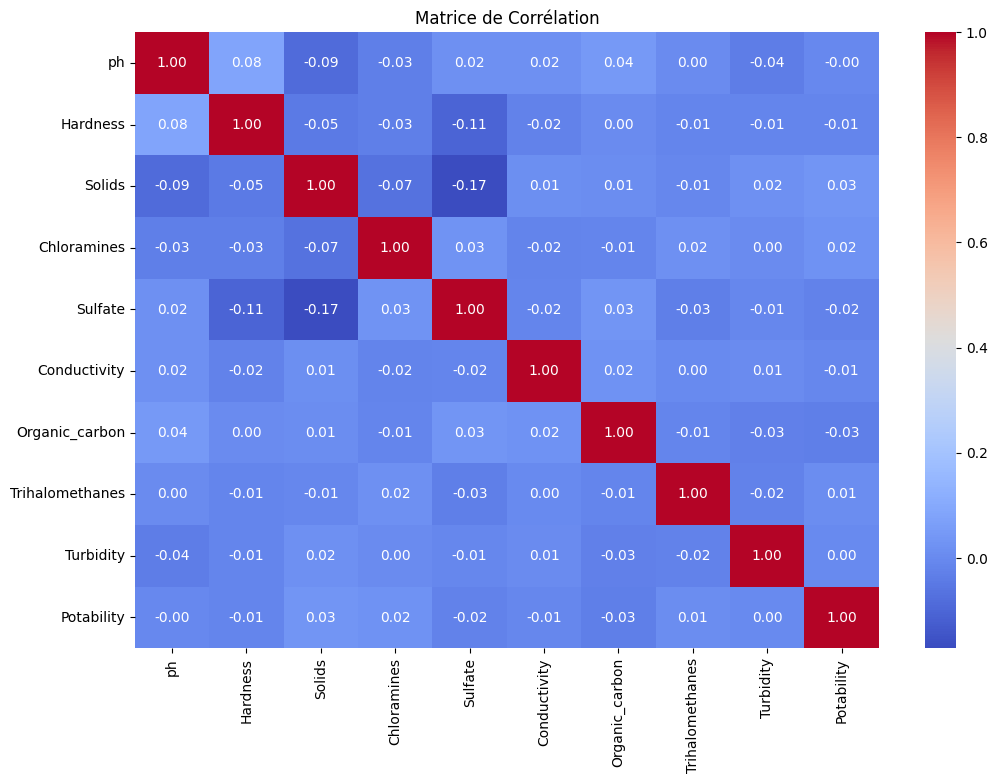

In [70]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Matrice de Corrélation")
plt.show()


Sulfate, Hardness, Solids ont des corrélations positives entre elles on pourrait faire attention à la multicolinéarité.
La modélisation devra combiner plusieurs caractéristiques pour avoir un bon pouvoir prédictif.

Nous avons choisi d'utiliser le MLP pour notre modèle

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC

In [72]:
X = data.drop("Potability", axis=1)
y = data["Potability"]

imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

MLP

In [73]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy', AUC()])

early_stop = EarlyStopping(patience=10, restore_best_weights=True)

C:\Users\Dorène\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrainement

In [74]:
model.fit(X_train, y_train, validation_data=(X_val, y_val),
          epochs=30, batch_size=32, callbacks=[early_stop], verbose=1)

Epoch 1/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5627 - auc_9: 0.4798 - loss: 0.7004 - val_accuracy: 0.6098 - val_auc_9: 0.5549 - val_loss: 0.6654
Epoch 2/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6078 - auc_9: 0.5139 - loss: 0.6729 - val_accuracy: 0.6250 - val_auc_9: 0.5771 - val_loss: 0.6615
Epoch 3/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6124 - auc_9: 0.5226 - loss: 0.6732 - val_accuracy: 0.6280 - val_auc_9: 0.5966 - val_loss: 0.6570
Epoch 4/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6287 - auc_9: 0.5714 - loss: 0.6581 - val_accuracy: 0.6341 - val_auc_9: 0.6057 - val_loss: 0.6523
Epoch 5/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6254 - auc_9: 0.5946 - loss: 0.6514 - val_accuracy: 0.6555 - val_auc_9: 0.6399 - val_loss: 0.6416
Epoch 6/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6303 - auc_9: 0.6294 - loss: 0.6410 - val_accuracy: 0.6646 - val_auc_9: 0.6497 - val_loss: 0.6355
Epoch 7/30
82/82 ━━━━━━━━━━━

le earlystop arrete le modèlepour éviter le surapprentissage au bon moment.


In [ ]:

loss, accuracy, auc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation AUC: {auc:.4f}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6844 - auc_9: 0.6300 - loss: 0.6289 
Validation Accuracy: 0.6951
Validation AUC: 0.6660


L'accuracy montre que notre modèle prédit correctement dans ~66.8 % des cas pendant l’évaluation.Un score > 0.5 est mieux que le hasard, mais < 0.7 reste assez faible

MLFLOW

In [76]:
import mlflow
import mlflow.sklearn
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pprint

MLFLOW

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

if mlflow.active_run():
      mlflow.end_run()

mlflow.set_experiment("experiment_water_quality")


with mlflow.start_run(run_name="MLP_Water_Quality"):

    selector = SelectKBest(score_func=f_classif, k=4)
    X_train_selected = selector.fit_transform(X_train, y_train)



<Experiment: artifact_location='file:///c:/Users/Dor%C3%A8ne/Documents/Waterflow/mlruns/831435424938404229', creation_time=1751926819551, experiment_id='831435424938404229', last_update_time=1751926819551, lifecycle_stage='active', name='experiment_water_quality', tags={}>

In [ ]:
input_shape = X_train_selected.shape[1]  

model = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy', AUC()])


C:\Users\Dorène\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
model.fit(X_train_selected, y_train, validation_data=(X_val, y_val),
          epochs=30, batch_size=32, callbacks=[early_stop], verbose=1)

Epoch 1/30
74/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5640 - auc_10: 0.5305 - loss: 0.6847

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_37" is incompatible with the layer: expected axis -1 of input shape to have value 4, but received input with shape (None, 9)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 9), dtype=float32)
  • training=False
  • mask=None